## This notebook presents steps to estimate $ET_0$ using the FAO Penman-Monteith method (Allen, 1998). 
Author: M. Vremec, University of Graz, 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyet as pyet

### Import meteorological data

In [2]:
meteo = pd.read_csv("data/meteo_maribor_2017.csv", sep=";", parse_dates=True, index_col=0, dayfirst=True)
tmean = meteo.loc[:,"tmean [°C]"]
tmax = meteo.loc[:,"tmax [°C]"]
tmin = meteo.loc[:,"tmin [°C]"]
rh = meteo.loc[:,"rh [%]"]
rhmax = meteo.loc[:,"rhmax [%]"]
rhmin = meteo.loc[:,"rhmin [%]"]
wind = meteo.loc[:,"u_2 [ms-1]"]
Rs = meteo.loc[:,"Rs [MJm-2d-1]"]
et_mb = meteo.loc[:,"Evap [mm/d]"]
elevation = 279
lat_deg = 46.5678
lat = lat_deg * np.pi / 180

### Penmam-Monteith

In [3]:
et_fao56 = pyet.pm_fao56(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_penman = pyet.penman(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_pt = pyet.priestley_taylor(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_mak = pyet.makkink(Rs, tmax=tmax, tmin=tmin, elevation=elevation)
et_hamon = pyet.hamon(tmean.index, tmean, lat)
et_har = pyet.hargreaves(tmean.index, tmax, tmin, lat)
et_jh = pyet.jensen_haise(tmean, Rs)
et_fao24 = pyet.priestley_taylor(wind, Rs=Rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh)
et_oudin = pyet.oudin(tmean, lat)
et_abtew = pyet.abtew(tmean, Rs)
et_turc = pyet.turc(tmean, Rs, rh)
et_mcbordne = pyet.mcguinness_bordne(tmean, lat)
et_linacre = pyet.linacre(tmean, elevation, lat_deg, tmax=tmax, tmin=tmin)
et_romanenko = pyet.romanenko(tmean, rh)

### Plot results

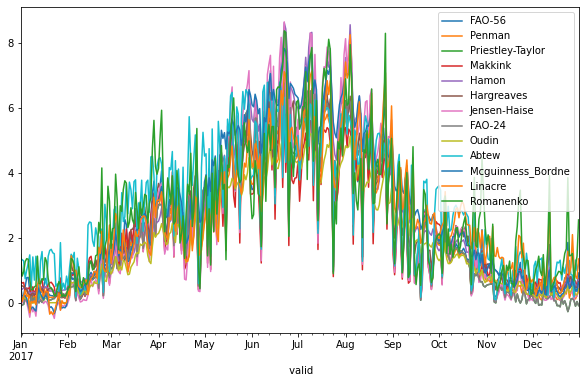

In [5]:
et_fao56.plot(figsize=(10,6), label="FAO-56")
et_penman.plot(label="Penman")
et_pt.plot(label="Priestley-Taylor")
et_mak.plot(label="Makkink")
et_hamon.plot(label="Hamon")
et_har.plot(label="Hargreaves")
et_jh.plot(label="Jensen-Haise")
et_fao24.plot(label="FAO-24")
et_oudin.plot(label="Oudin")
et_abtew.plot(label="Abtew")
#et_turc.plot(label="Turc")
et_mcbordne.plot(label="Mcguinness_Bordne")
et_linacre.plot(label="Linacre")
et_romanenko.plot(label="Romanenko")
plt.legend()